In [1]:
import seaborn as sns

In [2]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import dateutil.rrule as rrule
import matplotlib.dates as mdates
import matplotlib
import math
import statsmodels.api as sm
import re


import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
pd.options.mode.chained_assignment = None  # default='warn'
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
PATH = 'C:\\Users\\krzysztof.karabon\\OneDrive - GfK\\Desktop\\Prywata\\WroData\\20231119 Zanieczyszczenie powietrza'

In [4]:
WSKAZNIK = 'NO2_1g'

# Read Data

In [5]:
df_ZANIECZYSZCZENIA = pd.read_csv(f'{PATH}\\df_ZANIECZYSZCZENIA.csv')

In [6]:
df_ZANIECZYSZCZENIA

,Data,Value,STACJA,ZANIECZYSZCZENIE,rok,miesiac,dzien,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,2005-01-01 01:00:00,28.0,DsWrocBartni,NO2_1g,2005,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-01 02:00:00,28.0,DsWrocBartni,NO2_1g,2005,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-01 03:00:00,25.0,DsWrocBartni,NO2_1g,2005,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-01-01 04:00:00,27.0,DsWrocBartni,NO2_1g,2005,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-01-01 05:00:00,28.0,DsWrocBartni,NO2_1g,2005,1,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384889,2014-12-31 20:00:00,10.0,DsWrocAlWisn,SO2_1g,2014,12,31,NaN,NaN,NaN,NaN,NaN,NaN
1384890,2014-12-31 21:00:00,10.0,DsWrocAlWisn,SO2_1g,2014,12,31,NaN,NaN,NaN,NaN,NaN,NaN
1384891,2014-12-31 22:00:00,10.0,DsWrocAlWisn,SO2_1g,2014,12,31,NaN,NaN,NaN,NaN,NaN,NaN
1384892,2014-12-31 23:00:00,9.0,DsWrocAlWisn,SO2_1g,2014,12,31,NaN,NaN,NaN,NaN,NaN,NaN


# wizualizacja rozkładów

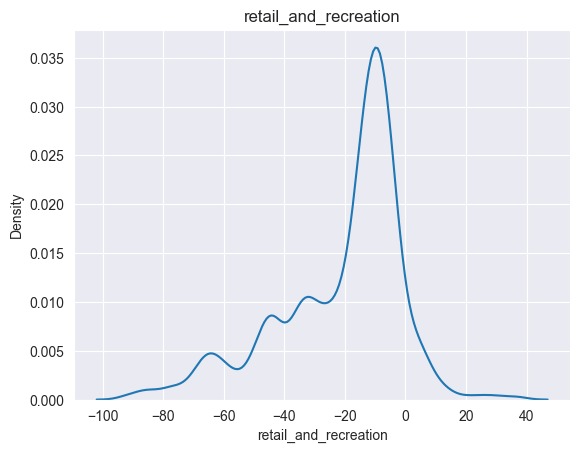

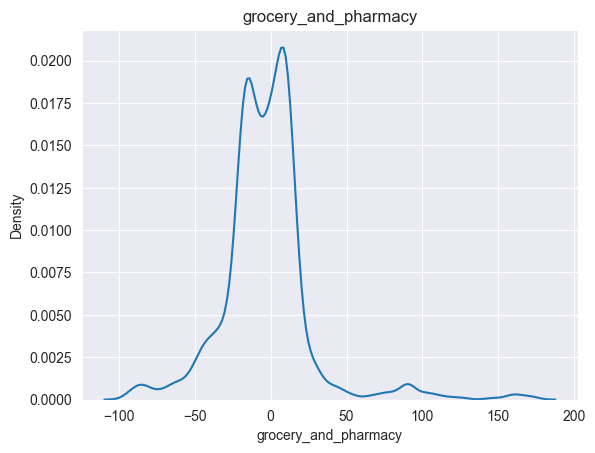

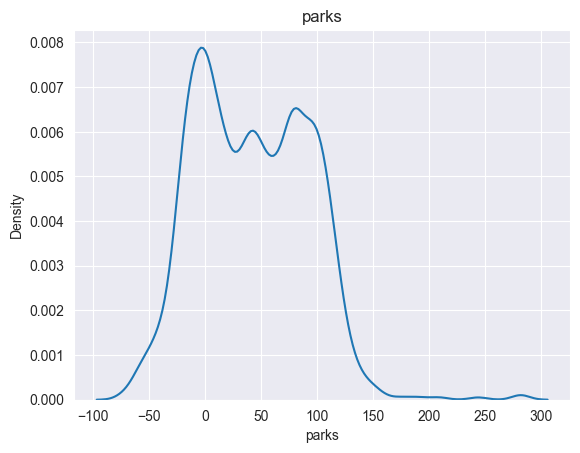

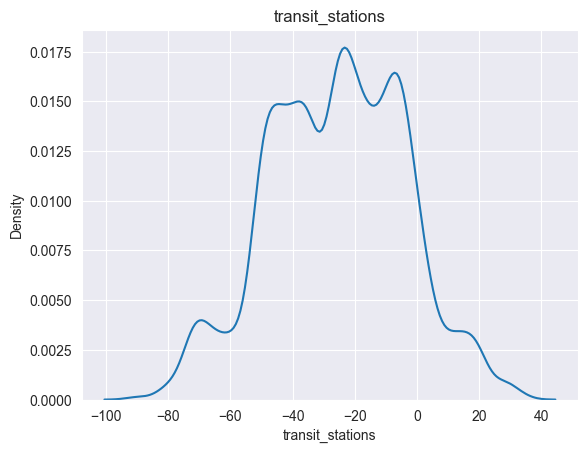

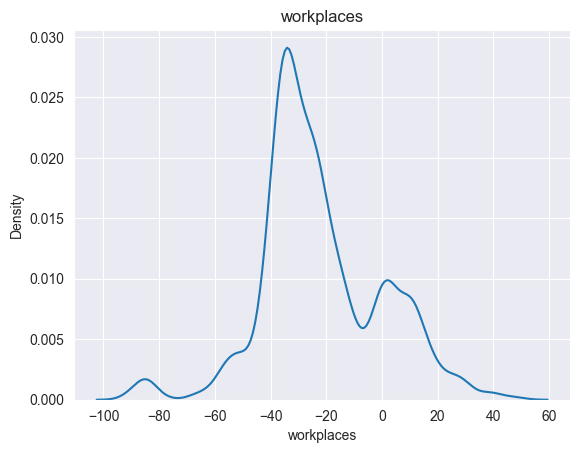

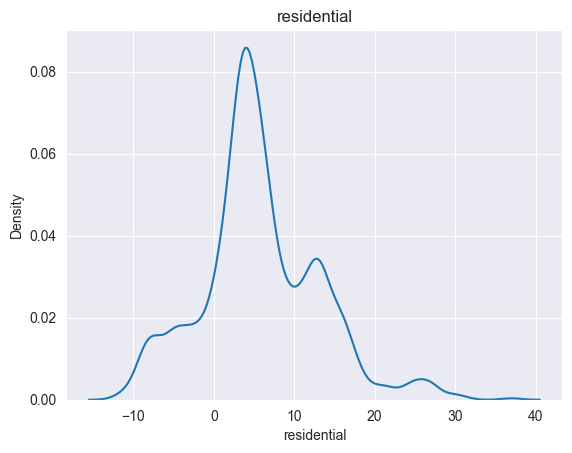

In [7]:

for x in ["retail_and_recreation", "grocery_and_pharmacy", "parks", "transit_stations", "workplaces", "residential"]:
    sns.kdeplot(data=df_ZANIECZYSZCZENIA, x=x)
    plt.title(x)
    plt.show()

C:\Users\krzysztof.karabon\AppData\Local\Temp\ipykernel_3428\361894979.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=hist_df, x="Value", hue = "rok")


(0.0, 100.0)

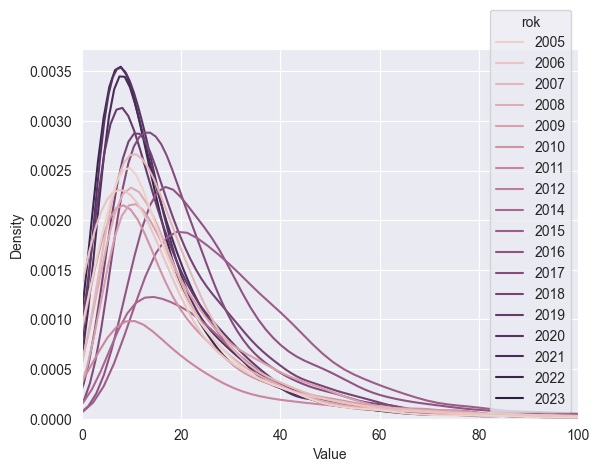

In [8]:
hist_df = df_ZANIECZYSZCZENIA.loc[df_ZANIECZYSZCZENIA['ZANIECZYSZCZENIE'] == 'NOx_1g', :]
hist_df = hist_df.loc[hist_df['STACJA'] == 'DsWrocBartni', :]

sns.kdeplot(data=hist_df, x="Value", hue = "rok")
plt.xlim([0, 100])

# model

In [9]:
dane_model = df_ZANIECZYSZCZENIA.copy(deep = True).dropna(subset = ['Value', ])


mobility_list = ['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']
# fillna
dane_model[mobility_list] = dane_model[mobility_list].fillna(0)


dane_model = dane_model.loc[dane_model['rok'] != 2023, :]

# add zmienne kontrolne
dane_model = pd.concat([
    dane_model.reset_index(drop = True),
    pd.get_dummies(dane_model['STACJA'].astype(str)).reset_index(drop = True).astype(int),
    pd.get_dummies(dane_model['rok'].astype(str)).reset_index(drop = True).astype(int),
    pd.get_dummies(dane_model['miesiac'].astype(str)).reset_index(drop = True).astype(int),
], ignore_index=False, axis = 1)


# add time index
dane_model['Data'] = pd.to_datetime(dane_model['Data'], format='ISO8601')
dane_model['date_index'] = (dane_model['Data'] - pd.to_datetime('2022-12-31')).dt.total_seconds().astype(int) / 60 / 60 / 24
# drop
dane_model = dane_model.drop(columns = ['STACJA', 'rok', 'miesiac', 'dzien', 'Data', ])
dane_model = dane_model.drop(columns = ['DsWrocWybCon', '2020', '1'])

# show
dane_model

,Value,ZANIECZYSZCZENIE,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,DsWrocAlWisn,DsWrocBartni,...,12,2,3,4,5,6,7,8,9,date_index
0,28.0,NO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,-6572.958333
1,28.0,NO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,-6572.916667
2,25.0,NO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,-6572.875000
3,27.0,NO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,-6572.833333
4,28.0,NO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,-6572.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251128,10.0,SO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,-2921.166667
1251129,10.0,SO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,-2921.125000
1251130,10.0,SO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,-2921.083333
1251131,9.0,SO2_1g,0.0,0.0,0.0,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,-2921.041667


In [10]:
dane_model_tmp = dane_model.loc[dane_model['ZANIECZYSZCZENIE'] == WSKAZNIK, :]
# drop
dane_model_tmp = dane_model_tmp.drop(columns = ['ZANIECZYSZCZENIE'])
# show
dane_model_tmp

,Value,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,DsWrocAlWisn,DsWrocBartni,2005,...,12,2,3,4,5,6,7,8,9,date_index
0,28.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,-6572.958333
1,28.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,-6572.916667
2,25.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,-6572.875000
3,27.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,-6572.833333
4,28.0000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,-6572.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403195,38.5682,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.791667
403196,35.2228,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.833333
403197,27.5823,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.875000
403198,21.6422,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.916667


In [11]:
Y = dane_model_tmp['Value']
X = dane_model_tmp.drop(['Value',], axis = 1)
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                 1.013e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:43:15   Log-Likelihood:            -1.7388e+06
No. Observations:              403200   AIC:                         3.478e+06
Df Residuals:                  403162   BIC:                         3.478e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    83.86

In [12]:
Y = dane_model_tmp['Value']
X = dane_model_tmp.drop(['Value', 'retail_and_recreation', 'residential', 'workplaces', '9'], axis = 1)
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:43:16   Log-Likelihood:            -1.7391e+06
No. Observations:              403200   AIC:                         3.478e+06
Df Residuals:                  403166   BIC:                         3.479e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0136 

In [13]:
Y = dane_model_tmp['Value']
X = dane_model_tmp.loc[:, ['date_index',  'DsWrocAlWisn', 'DsWrocBartni']] #'2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.173e+05
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:43:16   Log-Likelihood:            -1.7448e+06
No. Observations:              403200   AIC:                         3.490e+06
Df Residuals:                  403196   BIC:                         3.490e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           17.3383      0.068    256.684   

In [14]:
Y = dane_model_tmp['Value']
X = dane_model_tmp.loc[:, ['DsWrocAlWisn', 'DsWrocBartni']] #'2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 1.555e+05
Date:                Fri, 24 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:43:17   Log-Likelihood:            -1.7561e+06
No. Observations:              403200   AIC:                         3.512e+06
Df Residuals:                  403197   BIC:                         3.512e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.4773      0.050    490.786   